In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [152]:
#importing csv file
applicationData = pd.read_csv("./application_data.csv")
previousData = pd.read_csv("./previous_application.csv")
columnsDescription = pd.read_csv("./columns_description.csv",  encoding='cp1252')

In [6]:
applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
applicationData.shape

(307511, 122)

In [9]:
previousData.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
previousData.shape

(1670214, 37)

In [16]:
columnsDescription.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [17]:
columnsDescription.shape

(160, 5)

In [69]:
#checking the info, dtypes for application date
applicationData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [155]:
#checking all the null columns
emptyColumns = applicationData.isnull().sum()
emptyColumns

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [156]:
# listing the null values columns having more than 30%

emptyColumns=emptyColumns[emptyColumns.values>(0.3*len(emptyColumns))]
len(emptyColumns)

64

In [157]:
#droping all the 64 columns from the csv file

emptyColumns = list(emptyColumns[emptyColumns.values>=0.3].index)
applicationData.drop(labels=emptyColumns,axis=1,inplace=True)
applicationData.shape

(307511, 58)

In [73]:
len(emptyColumns)

64

In [158]:
#find the columns with less null percentage values
applicationData.isnull().sum()/len(applicationData)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


Among all the above columns 'AMT_ANNUITY' column has few null value rows

So here we will be filling those missing values with median

In [159]:
medianValues = applicationData['AMT_ANNUITY'].median()

applicationData.loc[applicationData['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = medianValues


In [160]:
applicationData['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [77]:
applicationData.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

Now that there are no null values in any columns, lets start with the rows

In [161]:
emptyRows = applicationData.isnull().sum(axis=1)
emptyRows

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Length: 307511, dtype: int64

In [79]:
len(emptyRows)

307511

In [162]:
# Removing rows having null values greater than or equal to 30%

emptyRows = list(emptyRows[emptyRows.values>=0.3*len(applicationData)].index)
applicationData.drop(labels=emptyRows, inplace=True, axis=0)

In [81]:
len(emptyRows)

0

Now that the rows clean up is completed, we will remove the unwanted columns from dataset

In [163]:
unwantedColumns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

applicationData.drop(labels=unwantedColumns,axis=1,inplace=True)

In [84]:
applicationData.shape

(307511, 28)

Now we will find the rows & column which has values XNA (Not Available)

In [164]:
#finding XNA in Gender column
applicationData[applicationData['CODE_GENDER']=='XNA'].shape

(4, 28)

There are 4 rows from gender columns with XNA value

In [86]:
#finding XNA in Organization column
applicationData[applicationData['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

There are 55374 rows from Organization column with XNA value

In [165]:
#finding the number of male & female in gender column
applicationData['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As show above there are more F compare to M in our dataset, and there are only 4 XNA value. So we will replace those with F 

In [166]:
applicationData.loc[applicationData['CODE_GENDER']=='XNA','CODE_GENDER']='F'
applicationData['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [89]:
applicationData['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

IN column 'ORGANIZATION_TYPE', we have total count of 307511 rows of which 55374 rows are having 'XNA' values. 18% of the column is having this values.
So we will drop the rows of total 55374, which will not have any major impact on our dataset.

In [167]:
# Dropping the rows of total 55374 have 'XNA' values in the organization type column

applicationData=applicationData.drop(applicationData.loc[applicationData['ORGANIZATION_TYPE']=='XNA'].index)
applicationData[applicationData['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [168]:
numericColumns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

applicationData[numericColumns]=applicationData[numericColumns].apply(pd.to_numeric)
applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


## Derived Metrics

In [169]:
# Creating bins for income amount

incomeBins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

applicationData['AMT_INCOME_RANGE']=pd.cut(applicationData['AMT_INCOME_TOTAL'],incomeBins,labels=slots)

In [170]:
# Creating bins for Credit amount

creditBins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots2 = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

applicationData['AMT_CREDIT_RANGE']=pd.cut(applicationData['AMT_CREDIT'],bins=creditBins,labels=slots2)

In [171]:
target1=applicationData.loc[applicationData["TARGET"]==0]
target2=applicationData.loc[applicationData["TARGET"]==1]

In [172]:
# Calculating Imbalance percentage
    
round(len(target1)/len(target2),2)

10.55

The Imbalance ratio is 10.55

### Univariate analysis for categories

#### doing Categorical Univariate Analysis in logarithmic scale for target=1(client with no payment difficulties)

In [173]:
# Count plotting in logarithmic scale

def funplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 34
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='terrain_r') 
        
    plt.show()

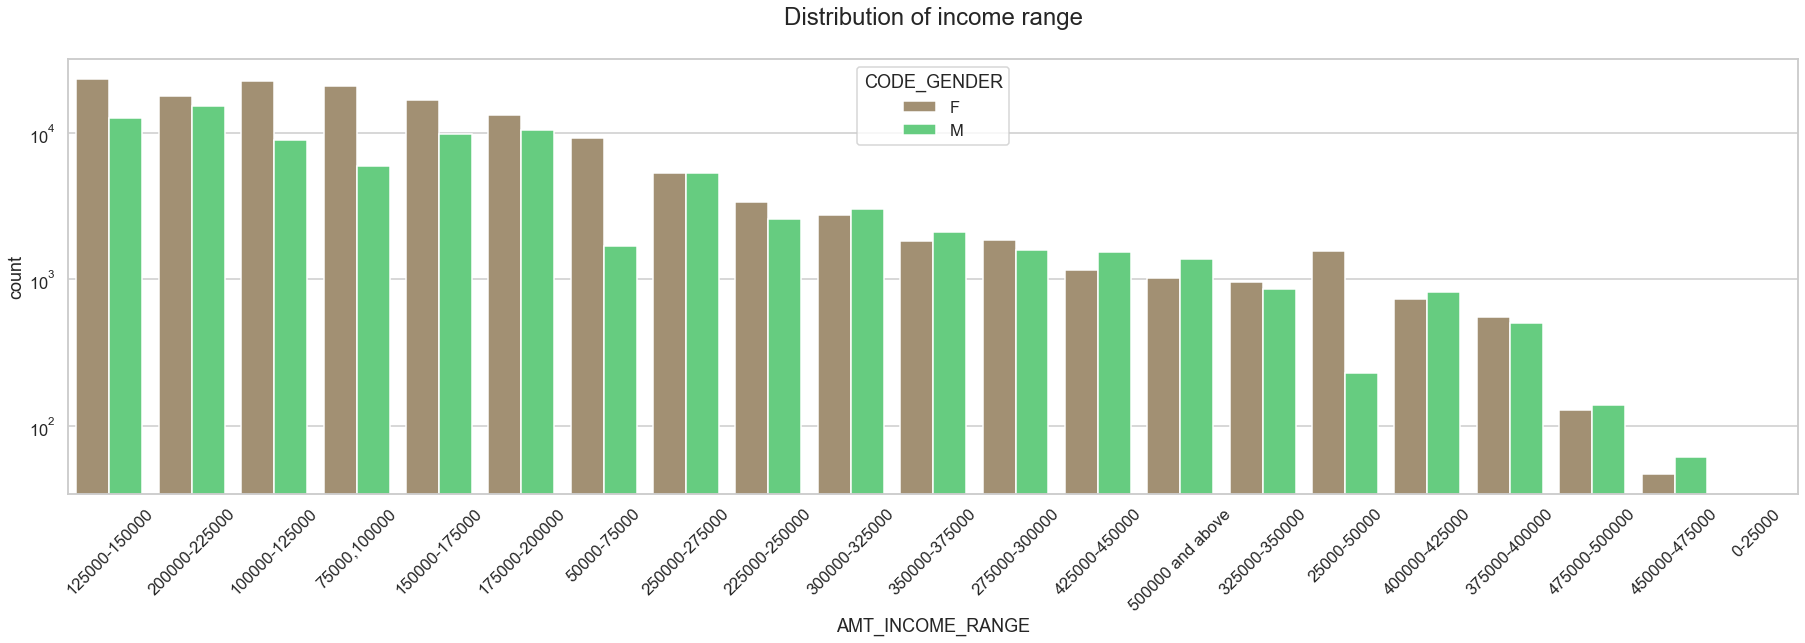

In [174]:


funplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')


Information gathered from the above graph

1. Very less count for income range 400000 and above.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Female counts are higher than male.

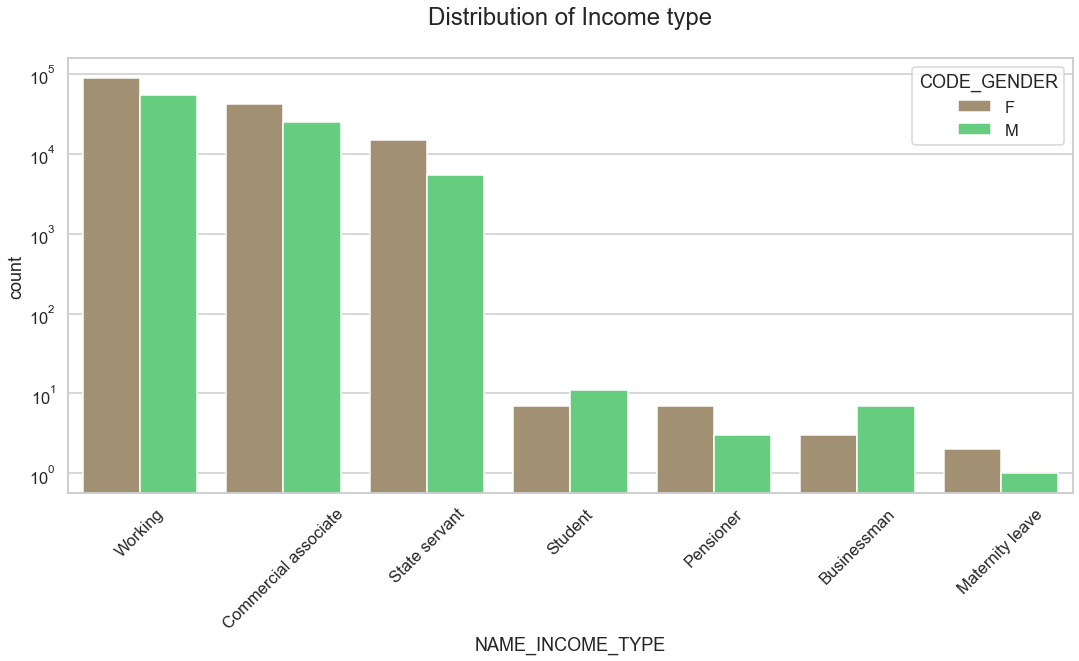

In [175]:
# Plotting for Income type

funplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Information gathered from the above graph

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

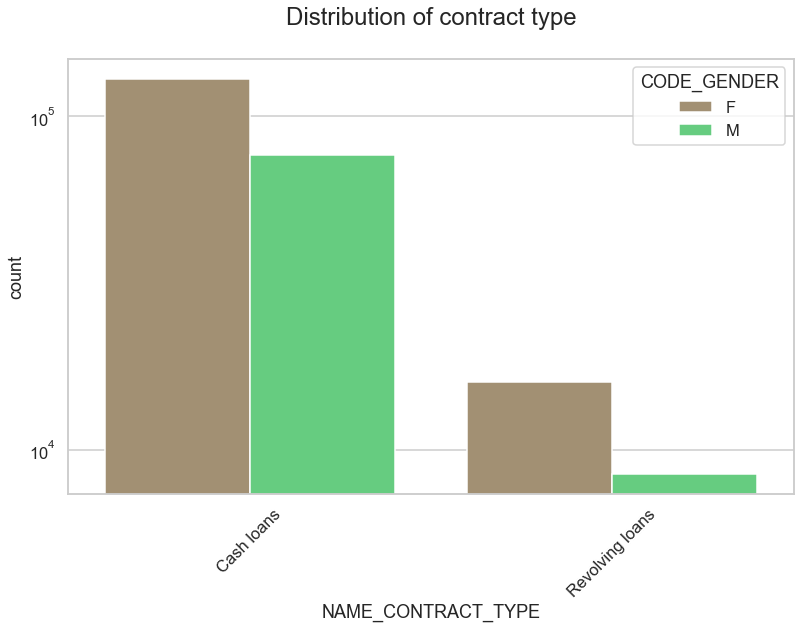

In [176]:
# Plotting for Contract type

funplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Information gathered from the above graph

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

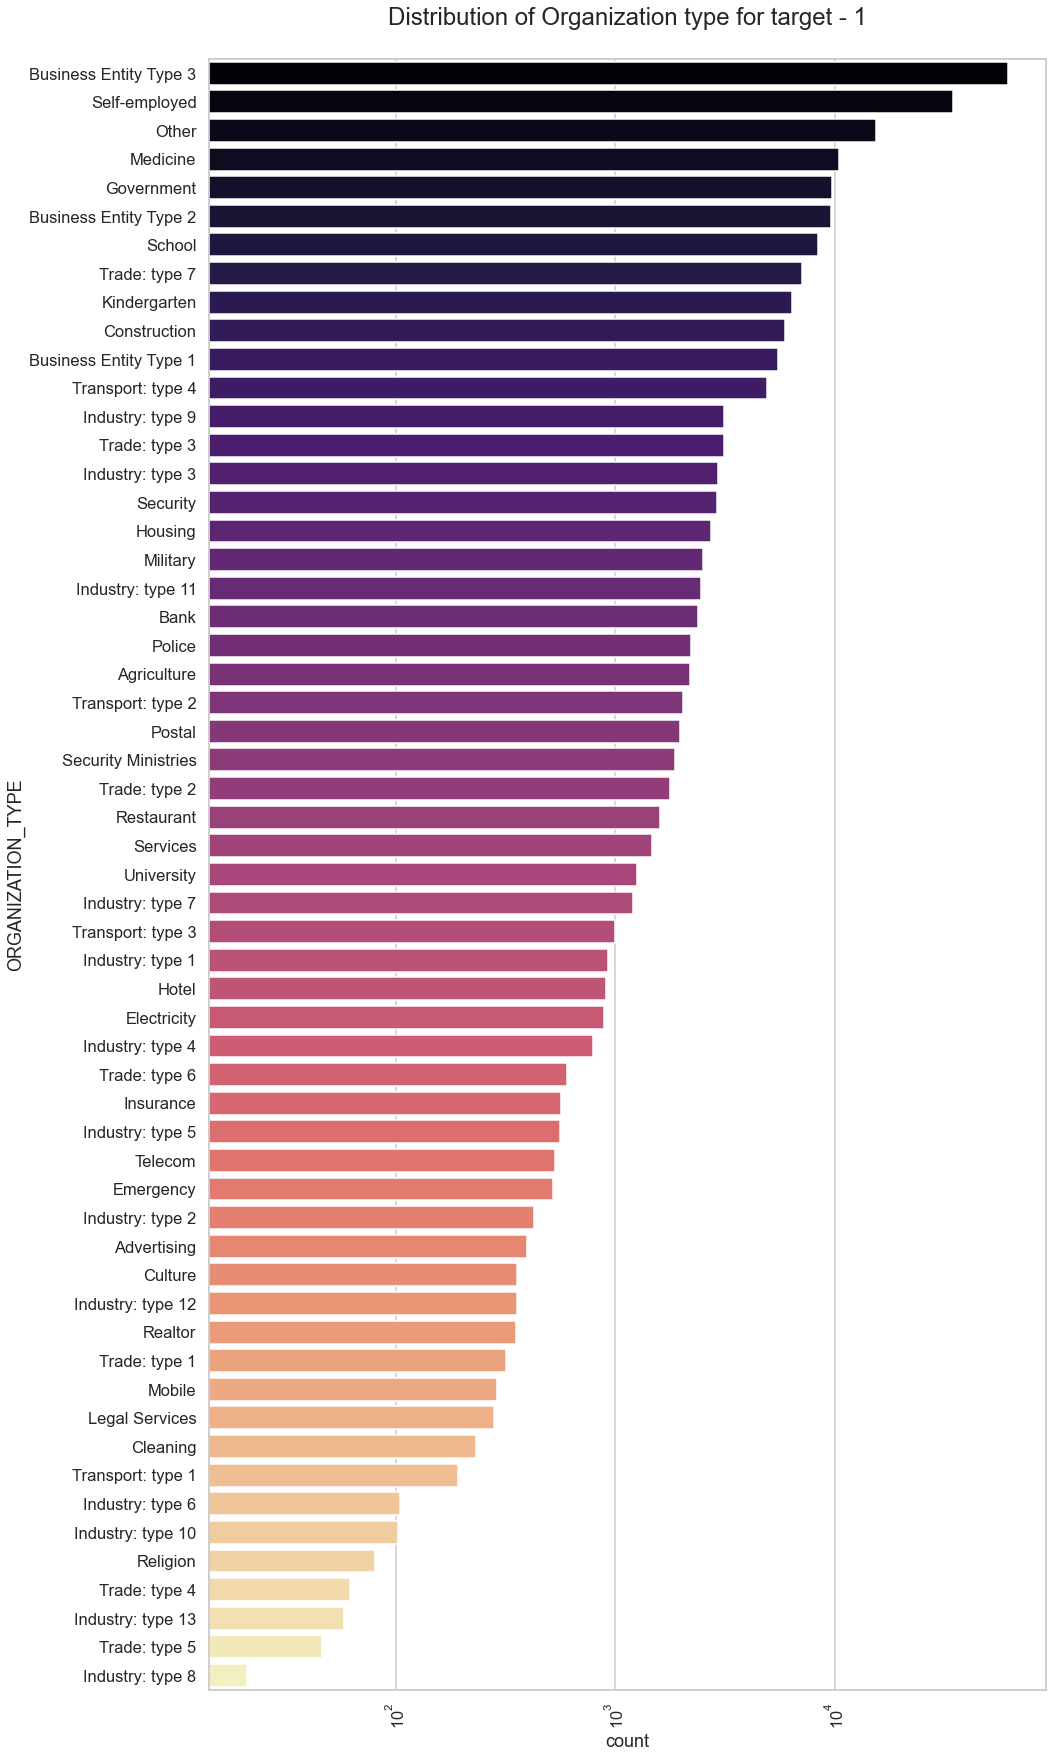

In [177]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 34

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1,y='ORGANIZATION_TYPE',order=target1['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

Information gathered from the above graph

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.

#### Now, doing Categoroical Univariate Analysis in logarithmic scale for target=2(client with payment difficulties)

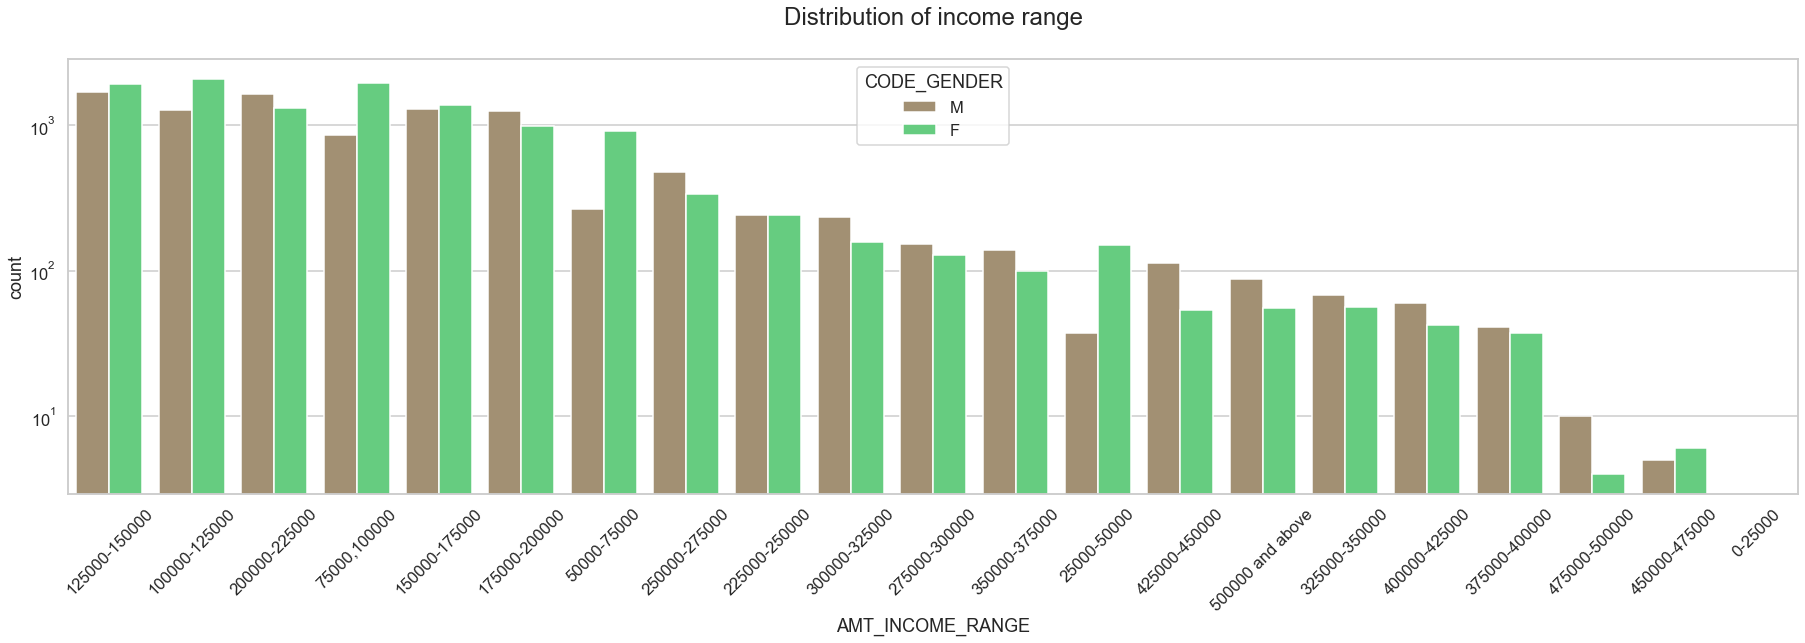

In [178]:
# PLotting for income range

funplot(target2,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Information gathered from the above graph

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

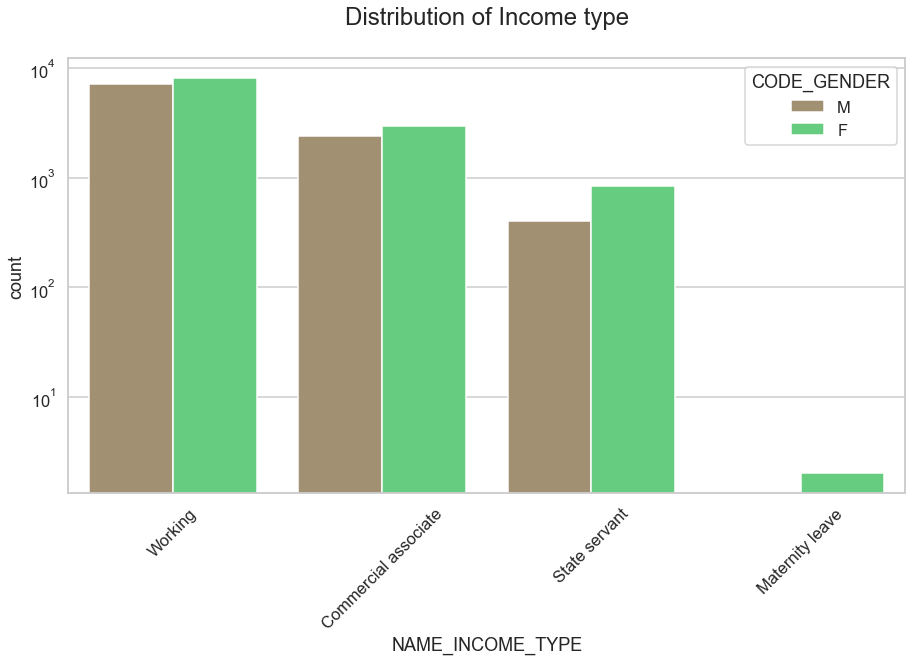

In [179]:
# Plotting for Income type

funplot(target2,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Information gathered from the above graph

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

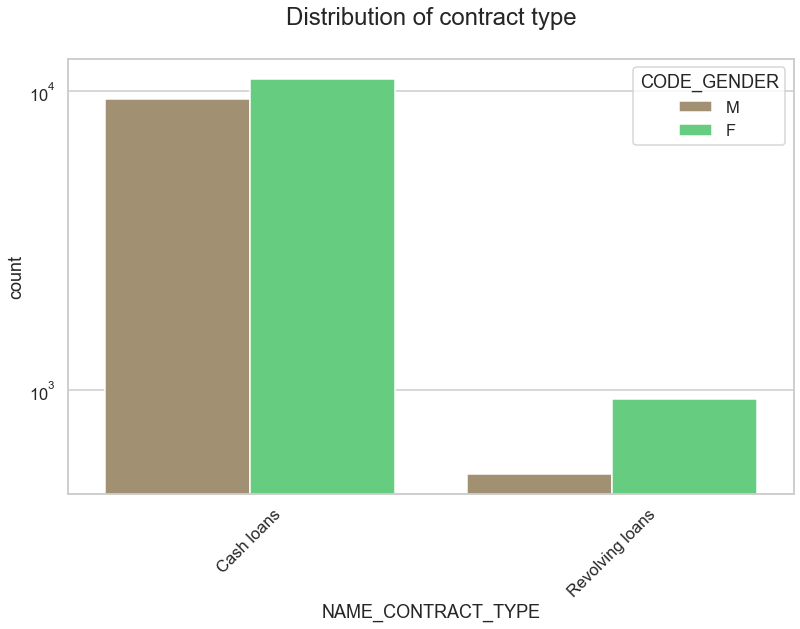

In [180]:
# Plotting for Contract type

funplot(target2,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Information gathered from the above graph

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

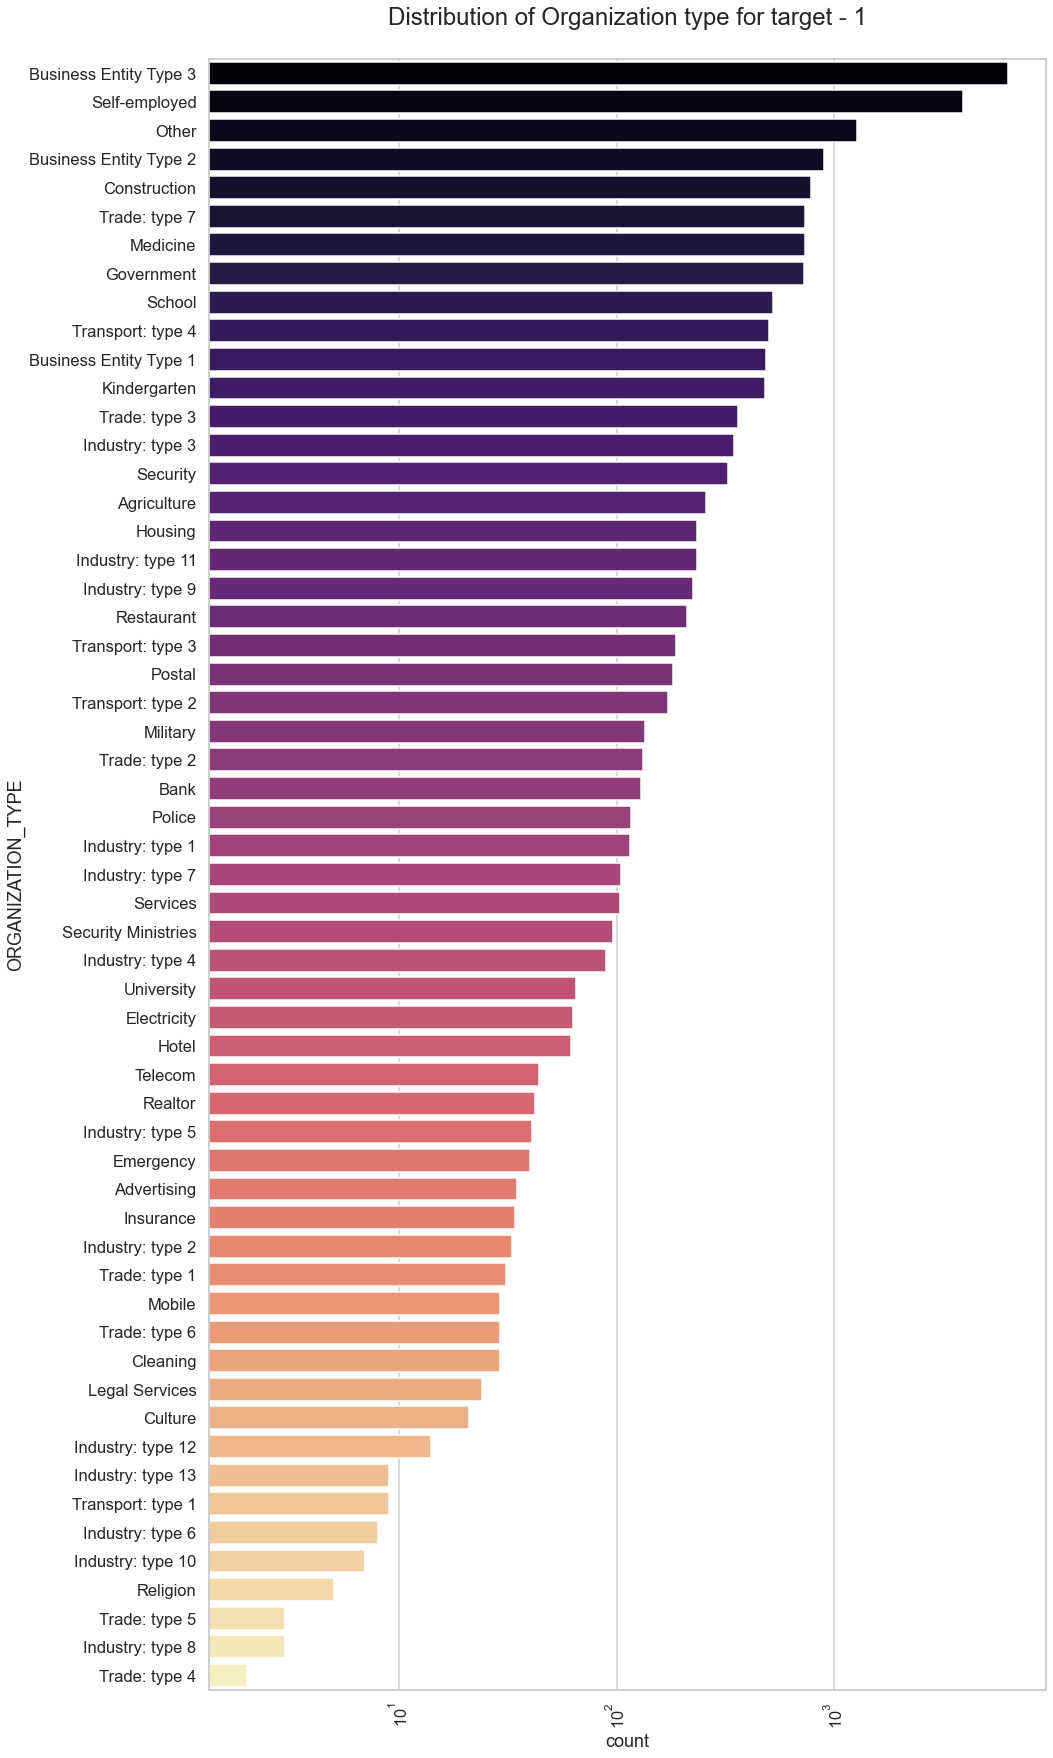

In [181]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.titlepad'] = 34

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target2,y='ORGANIZATION_TYPE',order=target2['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

Information gathered from the above graph

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.

In [182]:
# Finding correlation for numerical columns for both target 1 and 2

corr1=target1.iloc[0:,2:]
corr2=target2.iloc[0:,2:]

corrTarget1=corr1.corr(method='spearman')
corrTarget2=corr2.corr(method='spearman')

In [183]:
# Correlation for target 1

corrTarget1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332


In [184]:
# Correlation for target 2

corrTarget2.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753


In [185]:
# Plotting the above correlation with heat map as it is the best choice to visulaize

def targetsCorr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 80

    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

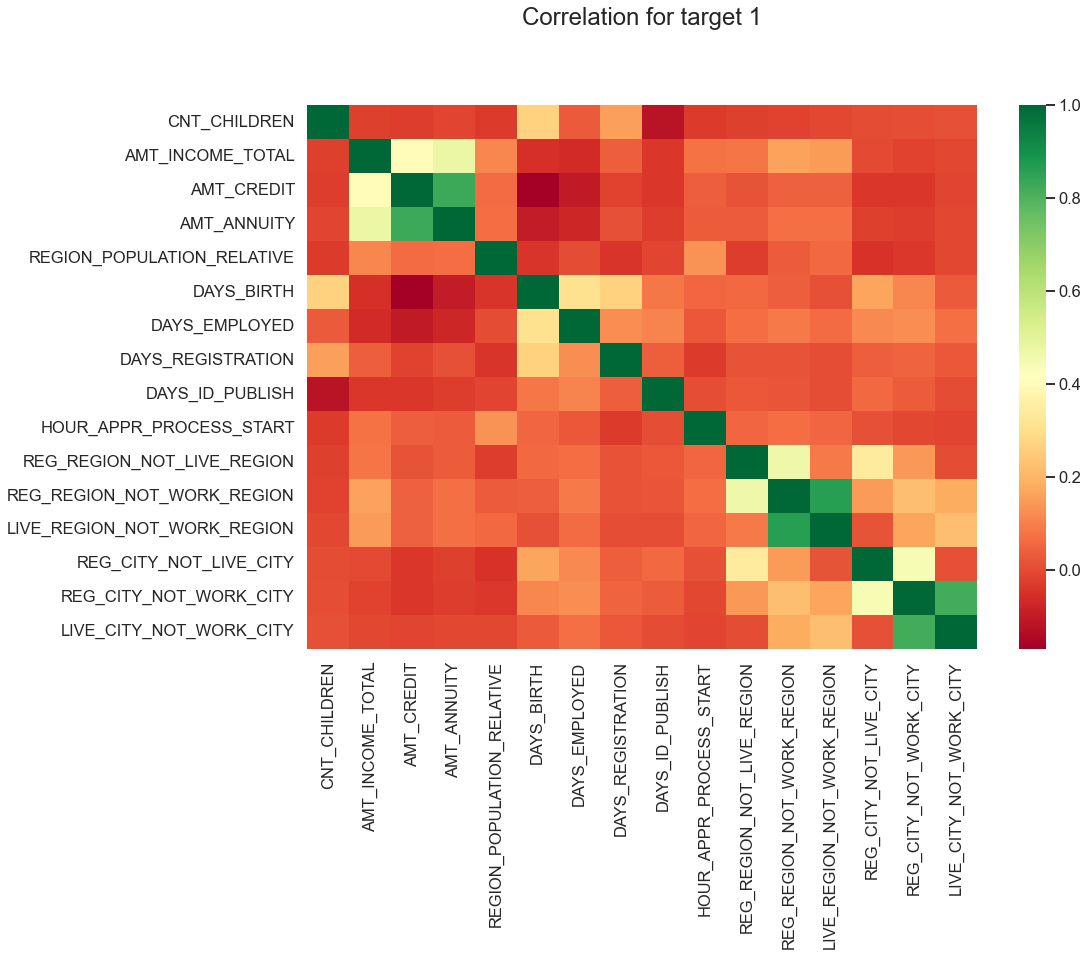

In [186]:
# For corrTarget 1

targetsCorr(data=corrTarget1,title='Correlation for target 1')

Information gathered from the above heatmap

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

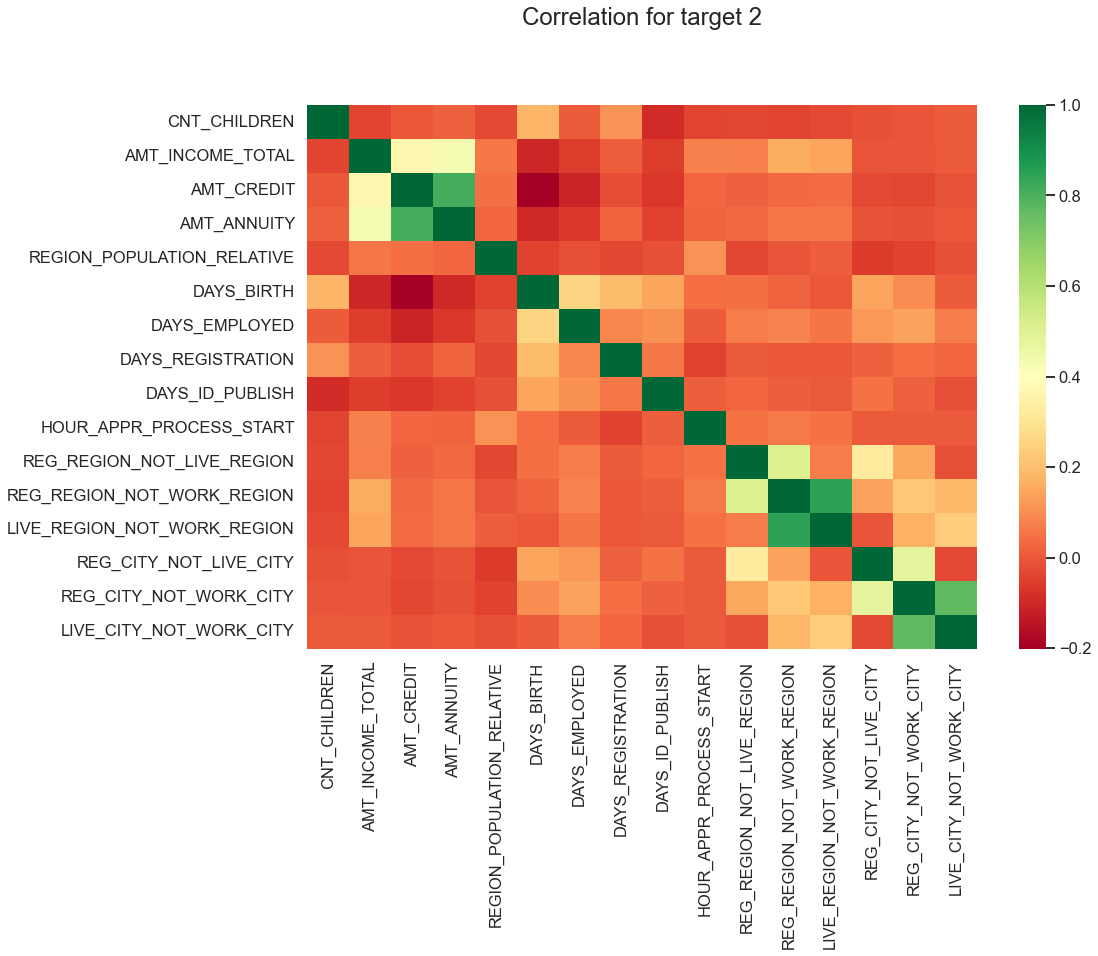

In [187]:
# For corrTarget 2

targetsCorr(data=corrTarget2,title='Correlation for target 2')

Information gathered from the above heat map

1. The client's permanent address does not match contact address are having less children and vice-versa
2. The client's permanent address does not match work address are having less children and vice-versa

### Univariate analysis for variables

In [188]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariateNumerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 34
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target2, y=col,orient='v',color='red')
    plt.show()

#### For Target 1 - Finding any outliers

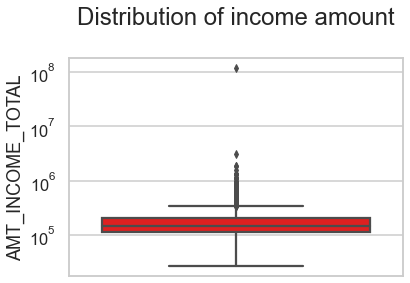

In [189]:
# Distribution of income amount

univariateNumerical(data=target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Information gathered from the above boxplot

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.

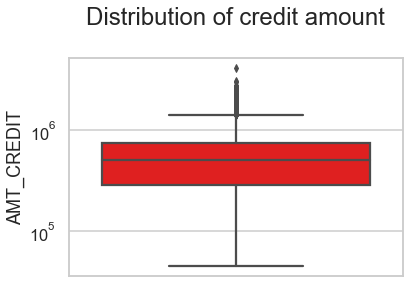

In [190]:
# Disrtibution of credit amount

univariateNumerical(data=target1,col='AMT_CREDIT',title='Distribution of credit amount')

Information gathered from the above boxplot

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

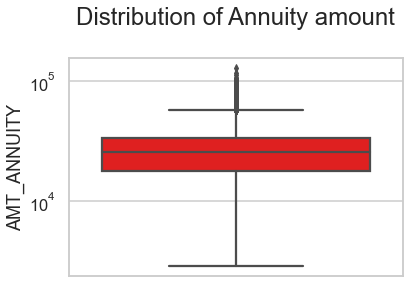

In [192]:
# Distribution of anuuity amount

univariateNumerical(data=target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Information gathered from the above boxplot

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

#### For Target 1 - Finding any outliers

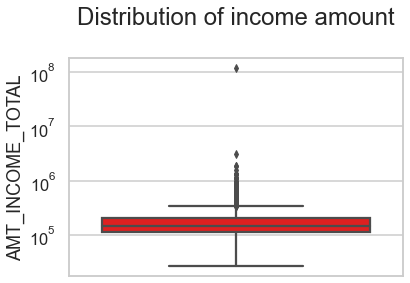

In [193]:
# Distribution of income amount

univariateNumerical(data=target2,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Information gathered from the above boxplot

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.

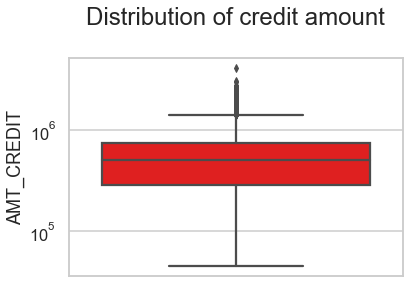

In [194]:
# Distribution of credit amount

univariateNumerical(data=target2,col='AMT_CREDIT',title='Distribution of credit amount')

Information gathered from the above boxplot

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

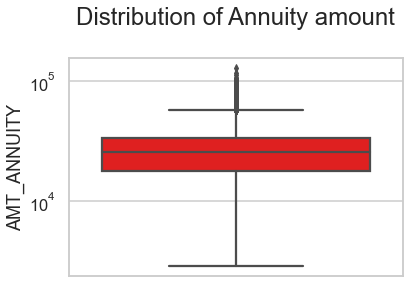

In [195]:
# Distribution of Annuity amount

univariateNumerical(data=target2,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Information gathered from the above boxplot

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### Bivariate analysis for numerical variables

#### Target 1

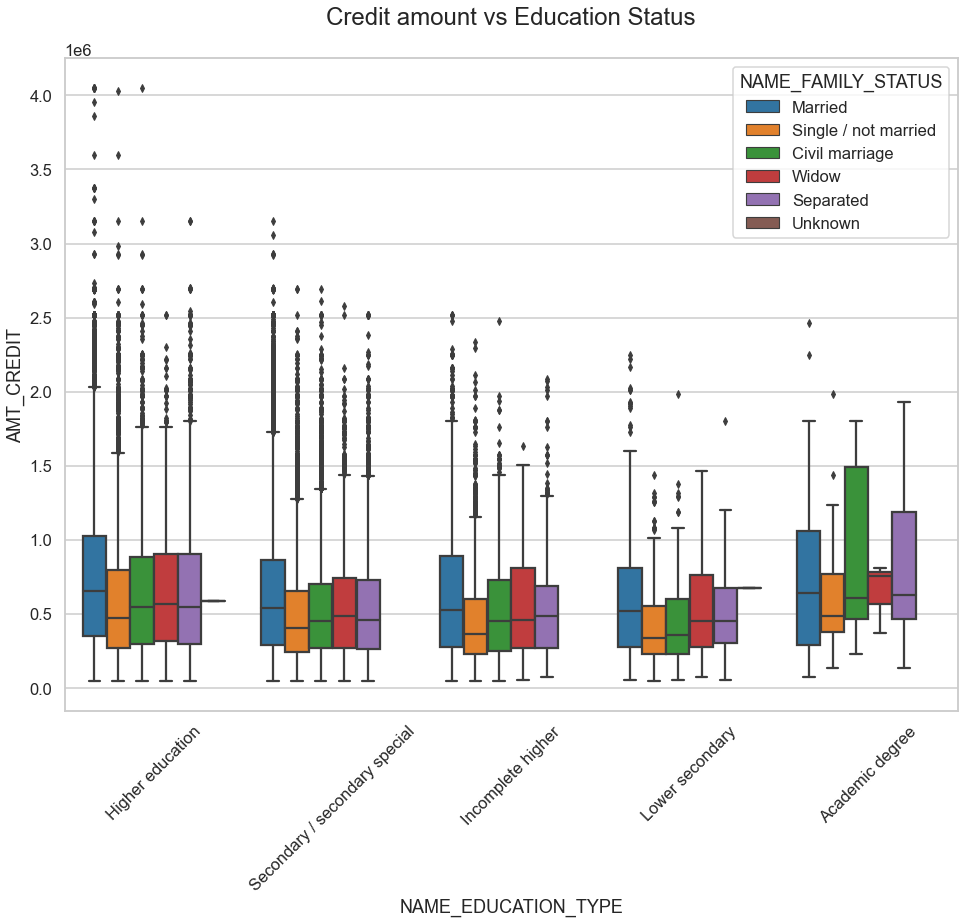

In [196]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above boxplot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
And the higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

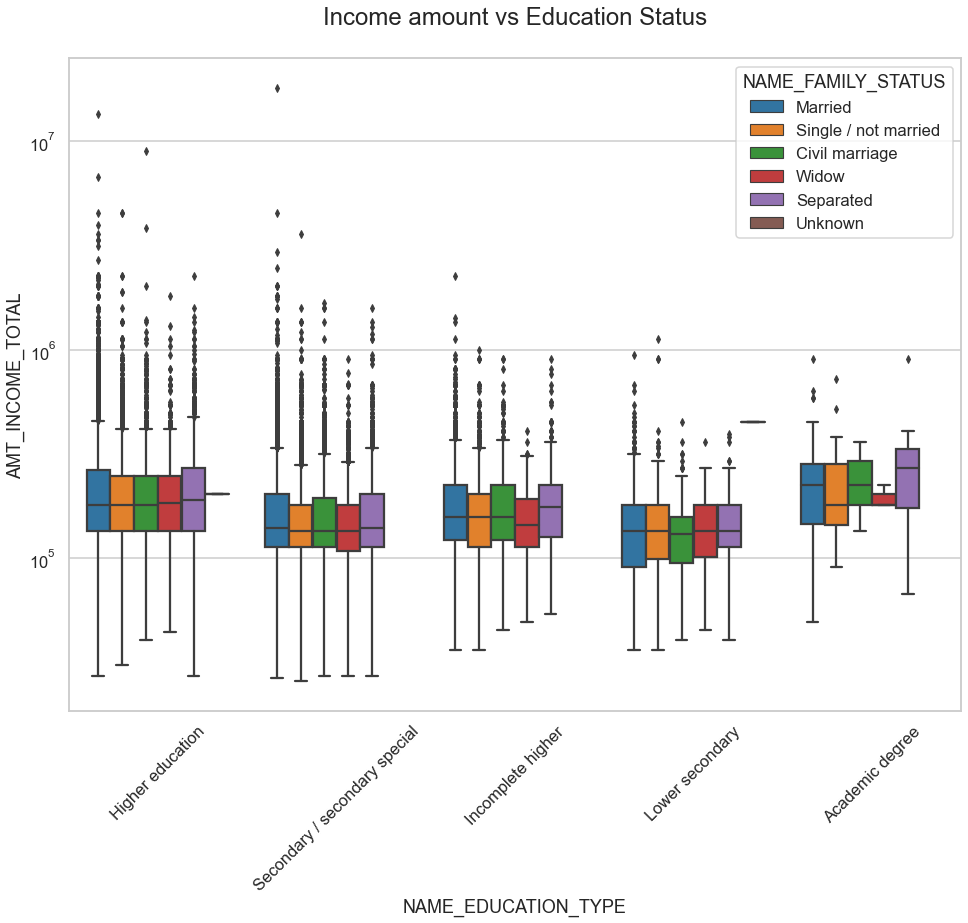

In [197]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

### Target 2

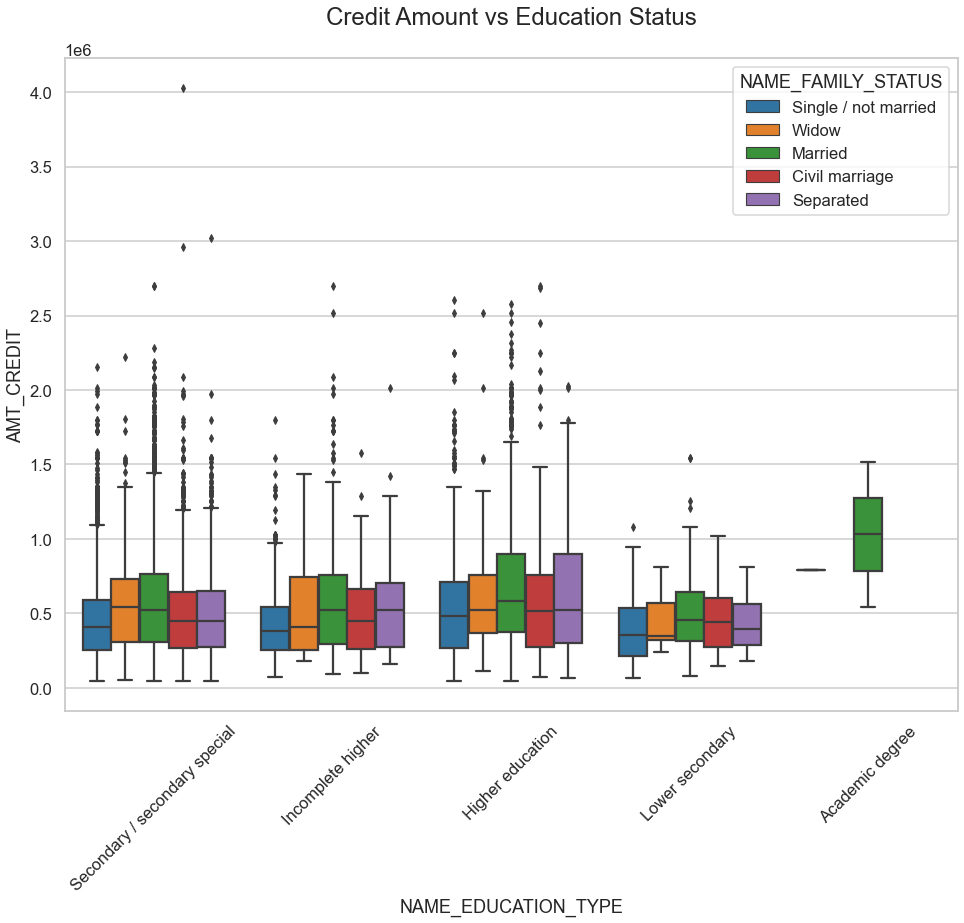

In [198]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target2, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

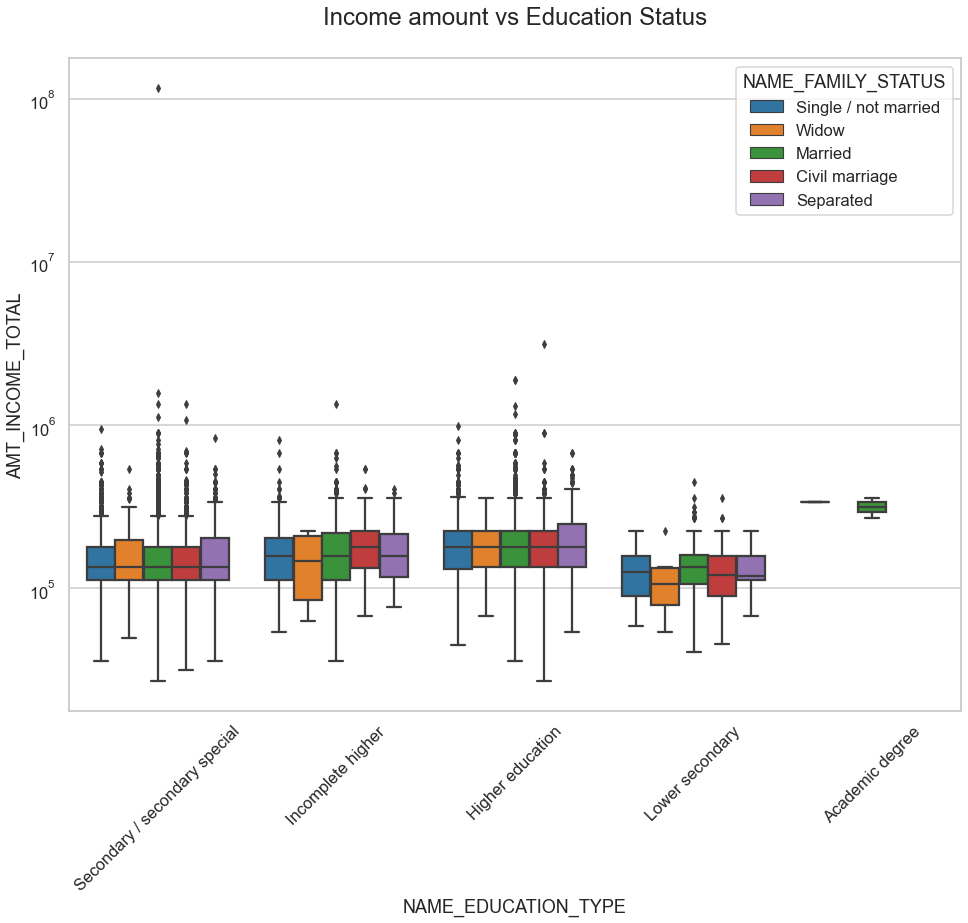

In [199]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target2, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

### Now we will be working with the previous application dataset

In [200]:
# listing the null values columns having more than 30%

emptyColumn1=previousData.isnull().sum()
emptyColumn1=emptyColumn1[emptyColumn1.values>(0.3*len(emptyColumn1))]
len(emptyColumn1)

15

In [201]:
# Removing those 15 columns

emptyColumn1 = list(emptyColumn1[emptyColumn1.values>=0.3].index)
previousData.drop(labels=emptyColumn1,axis=1,inplace=True)

previousData.shape

(1670214, 22)

In [202]:
# Removing the column values of 'XNA' and 'XAP'

previousData=previousData.drop(previousData[previousData['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previousData=previousData.drop(previousData[previousData['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previousData=previousData.drop(previousData[previousData['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

previousData.shape

(69635, 22)

### Now we will be merging the application dataset with previous dataset

In [203]:
mergedDataset=pd.merge(left=applicationData,right=previousData,how='inner',on='SK_ID_CURR',suffixes='_x')

In [204]:
mergedDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [205]:
mergedDataset.shape

(51420, 51)

In [206]:
# Renaming the column names in the merged dataset

mergedDatasetRenamed = mergedDataset.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [207]:
# Removing unwanted columns for analysis

mergedDatasetRenamed.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Preforming Univariate Analysis

In [209]:
def funcountplot(title, order, name):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.figure(figsize=(15,30))
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 34
    plt.xticks(rotation=90)
    plt.xscale('log')
    plt.title(title)
    ax = sns.countplot(data = mergedDatasetRenamed, y= order, 
                    order= mergedDatasetRenamed[order].value_counts().index,hue = name,palette='terrain_r') 

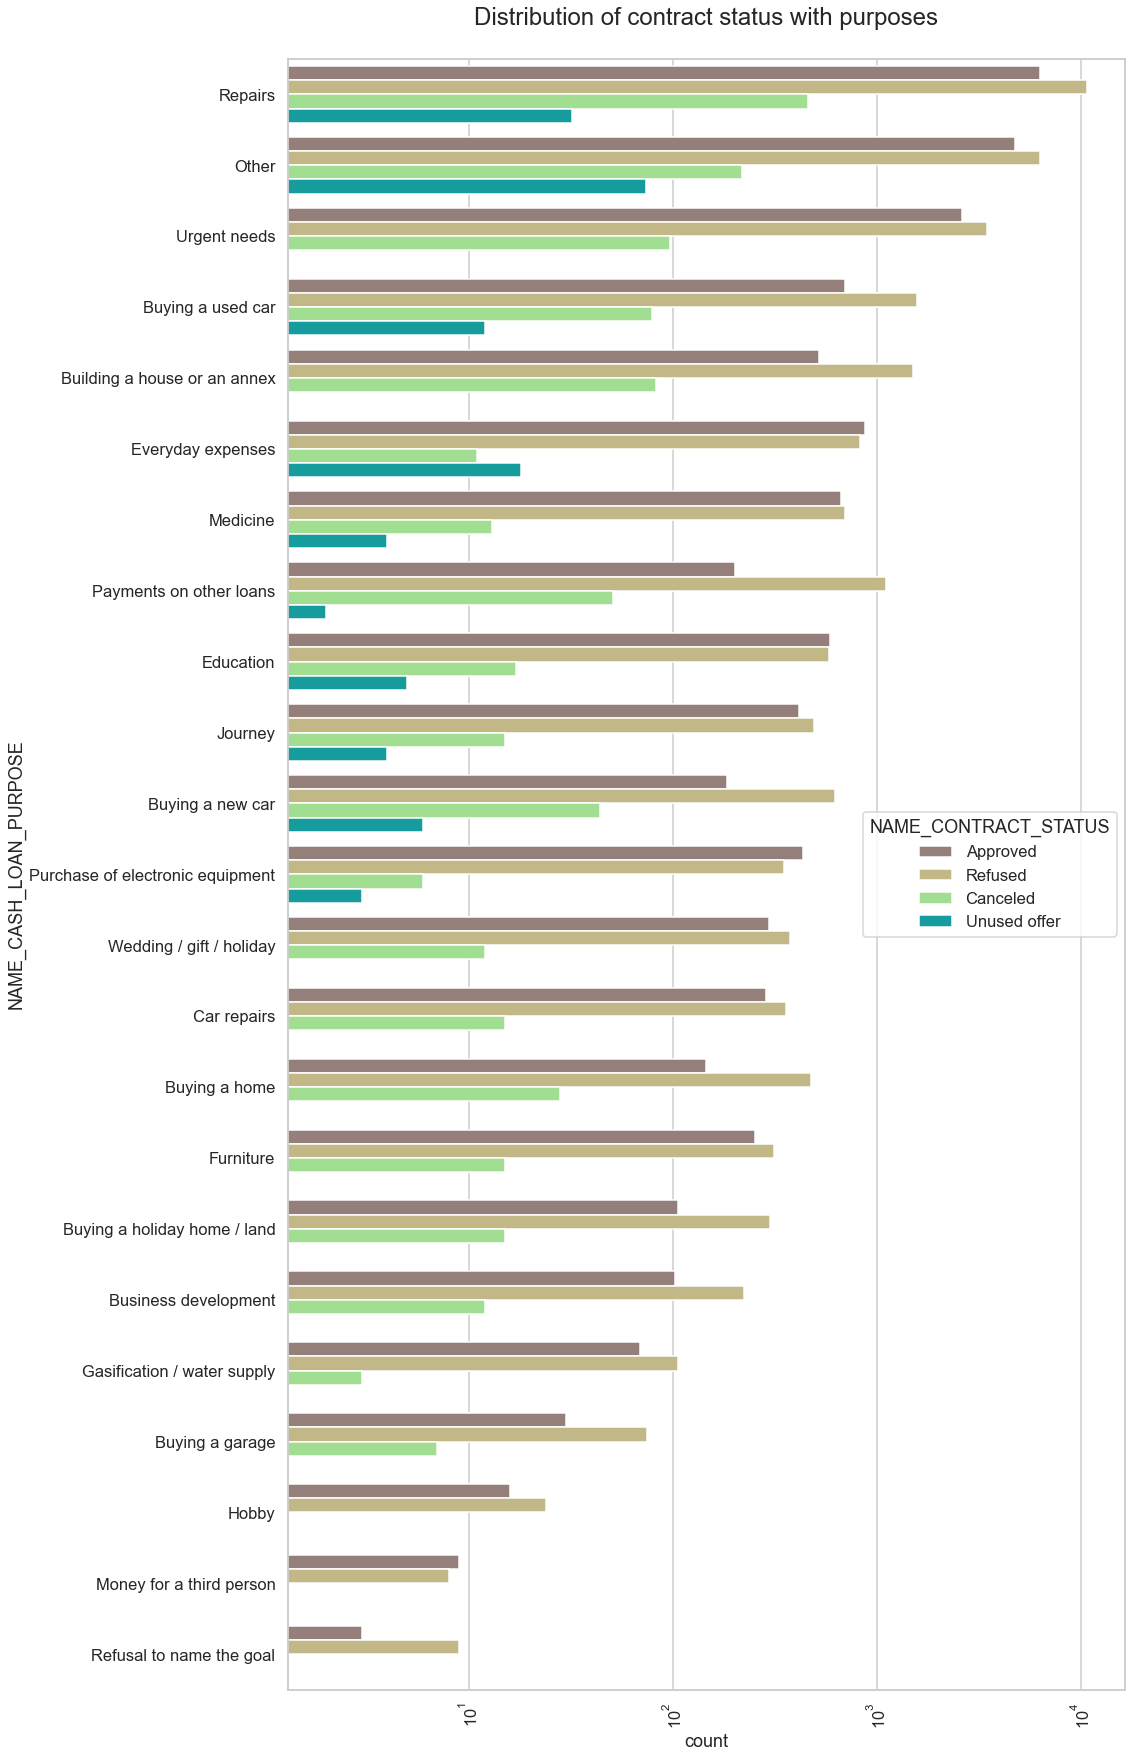

In [210]:
# Distribution of contract status in logarithmic scale
funcountplot('Distribution of contract status with purposes','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS')


Information gathered from the above graph

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

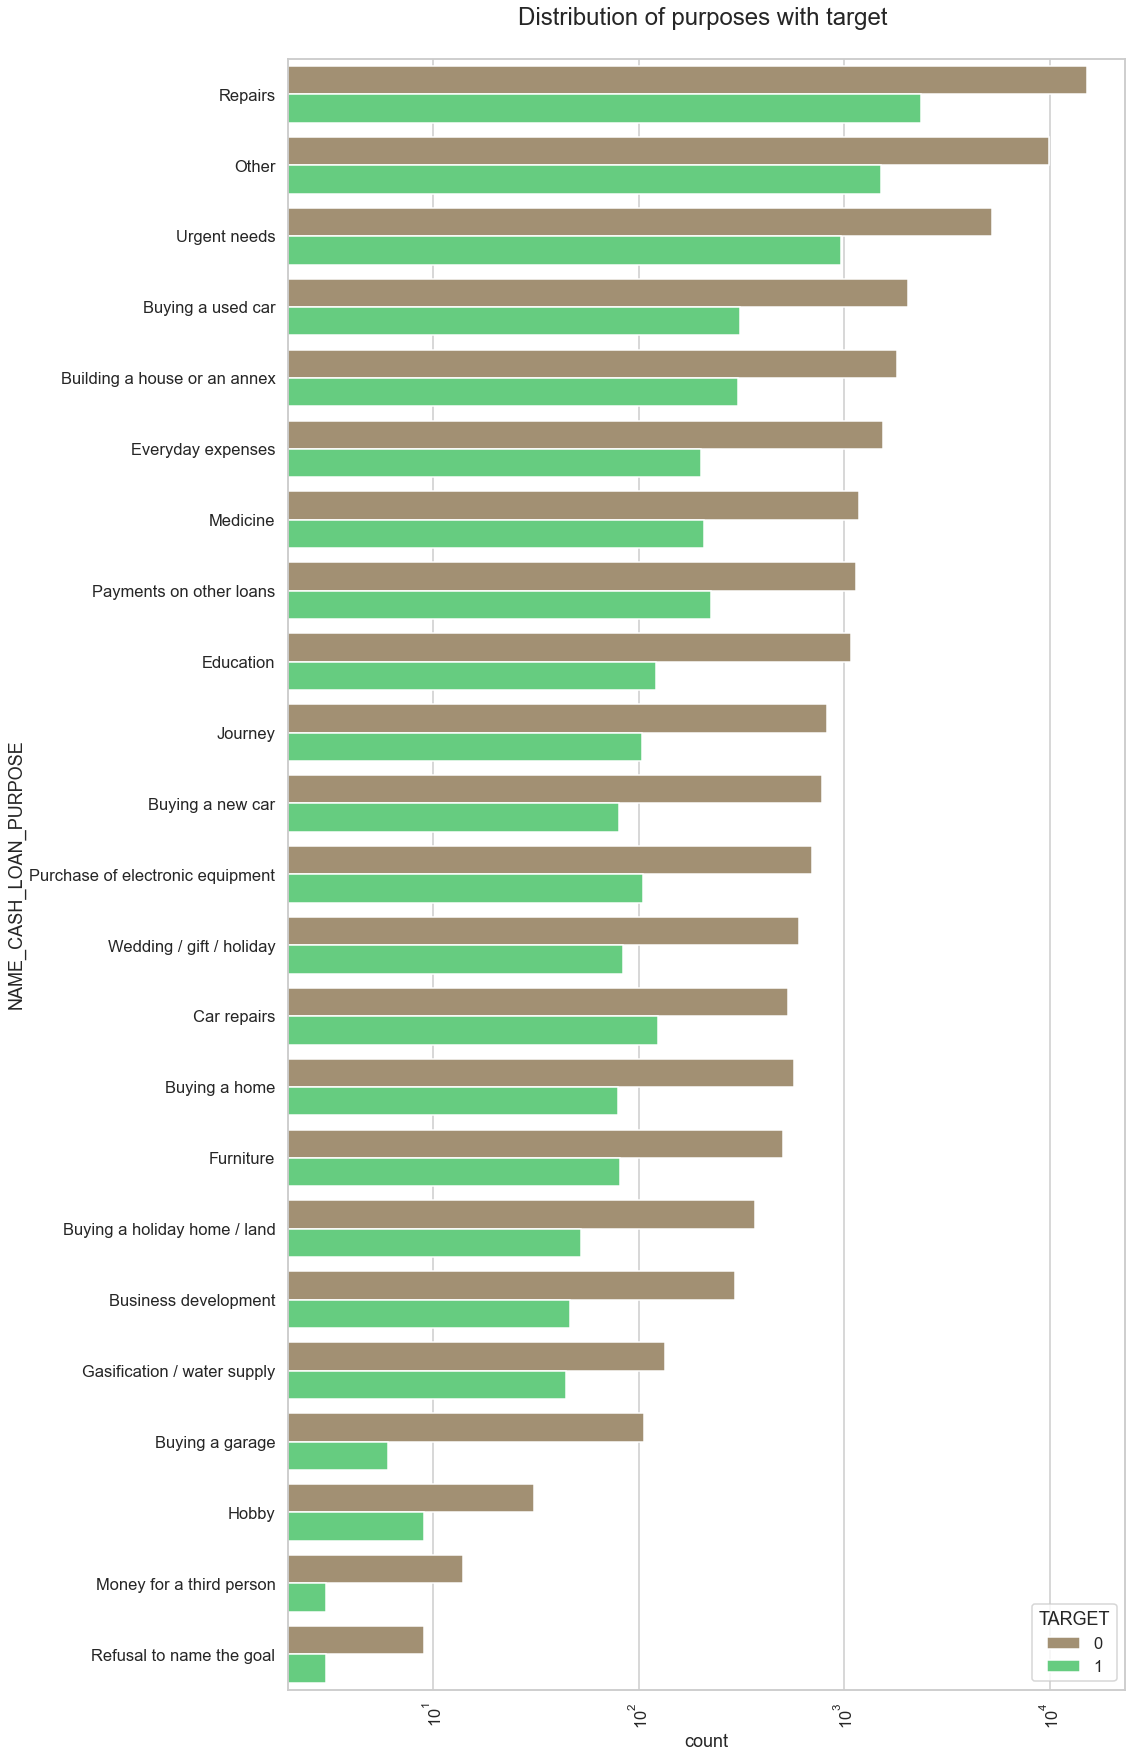

In [211]:
# Distribution of contract status
funcountplot('Distribution of purposes with target ','NAME_CASH_LOAN_PURPOSE','TARGET')

Information gathered from the above graph

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'
Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

#### Performing bivariate analysis

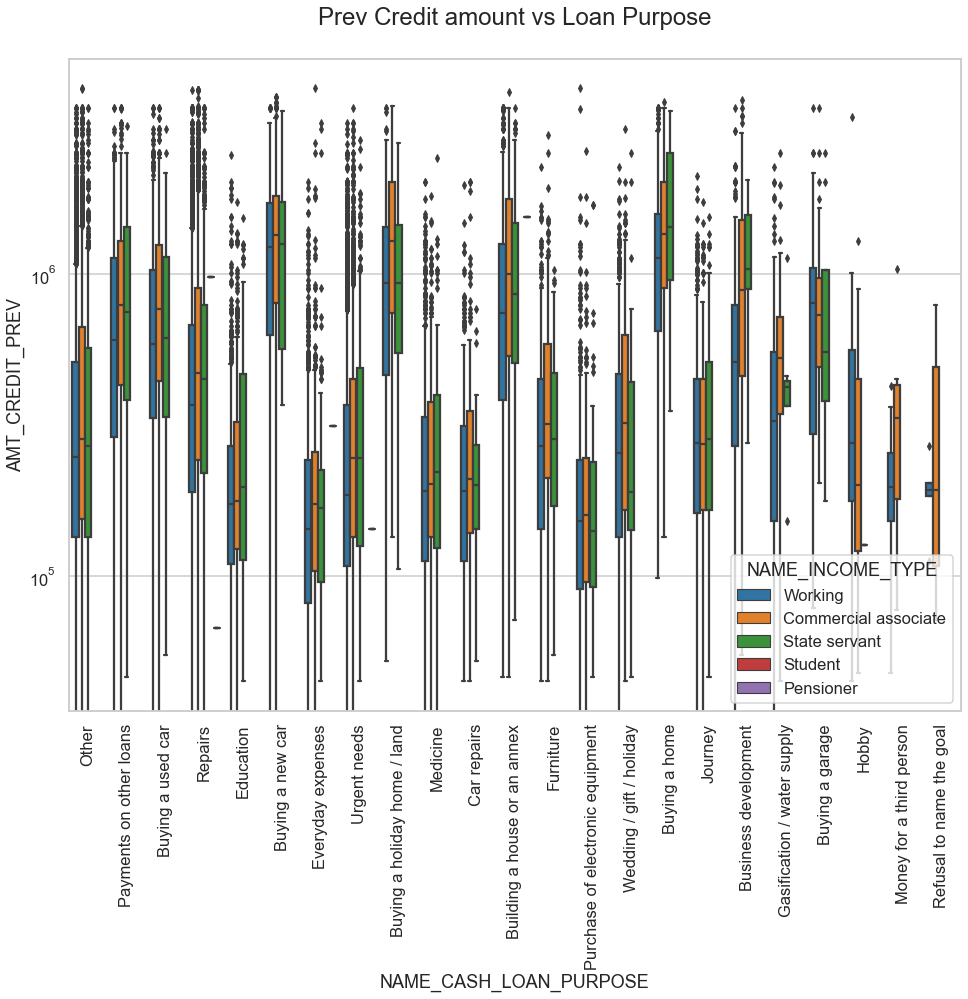

In [212]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =mergedDatasetRenamed, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Information gathered from the above graph

1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

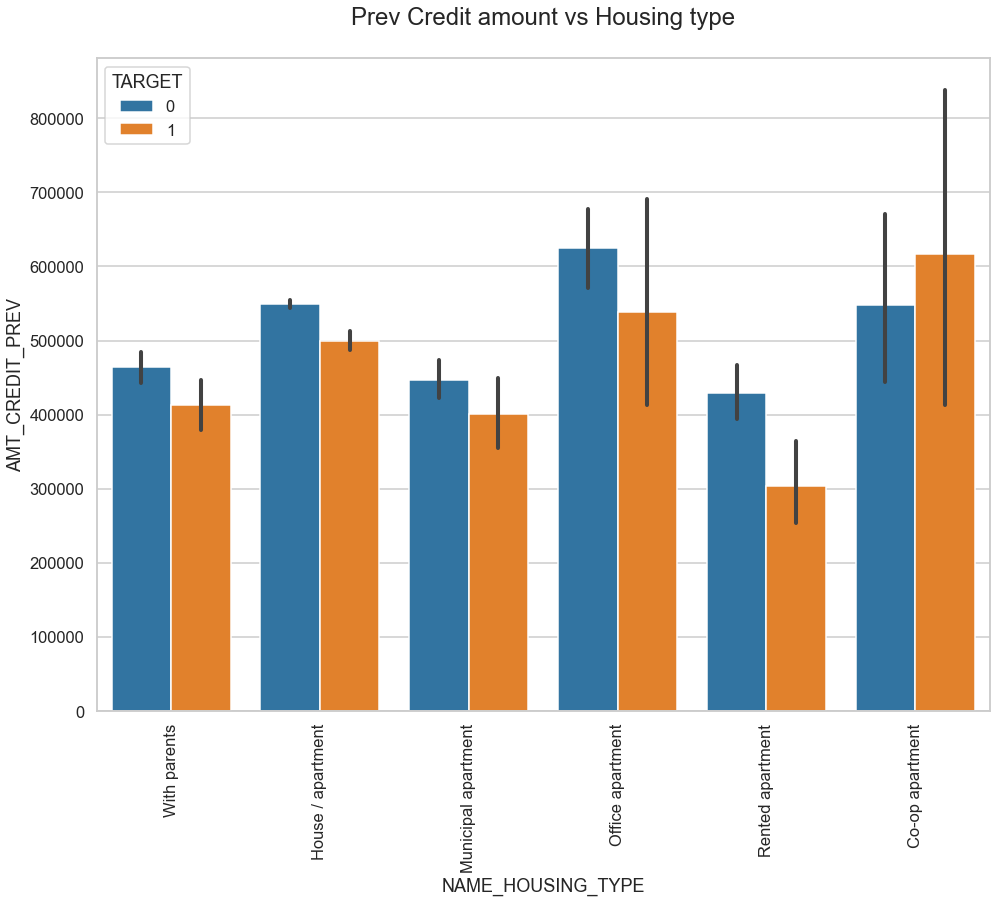

In [213]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =mergedDatasetRenamed, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# Conclusion

- Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.
- Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
- Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
- Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.